In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import csv
import scipy.linalg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import axes3d

## Exercise 1.1 PCA: 2-dimenssional Toy Data.


### a) Load dataset and center.

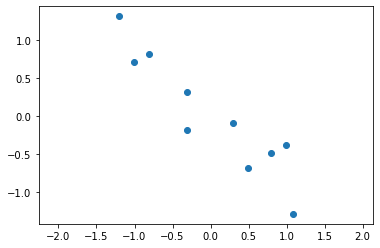

In [3]:
data_2d = np.loadtxt('pca-data-2d.dat')
data_2d_cent = (data_2d - np.mean(data_2d,axis=0)).T
plt.scatter(data_2d_cent[0],data_2d_cent[1])
plt.axis('equal');

### b) Determine PCs and create another scatter plot spanning the data with the coordinate system of the 2 PCs.

The eigenvalues are  [1.28402771 0.0490834 ]
The eigenvectors are  [[ 0.73517866 -0.6778734 ]
 [ 0.6778734   0.73517866]]


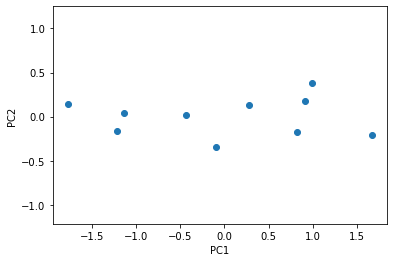

In [133]:
cov = np.cov(data_2d_cent)
eig_val, eig_vec = np.linalg.eig(cov)
idx = np.argsort(eig_val, axis = 0)[::-1]
sorted_evec = eig_vec[:,idx].T

print('The eigenvalues are ', eig_val[idx])
print('The eigenvectors are ', sorted_evec)
pca_data_2d = sorted_evec @ data_2d_cent
plt.scatter(pca_data_2d[0],pca_data_2d[1]);
plt.axis('equal');
plt.xlabel('PC1')
plt.ylabel('PC2');

### c) Plot the reconstruction of the data.

NotImplementedError: 

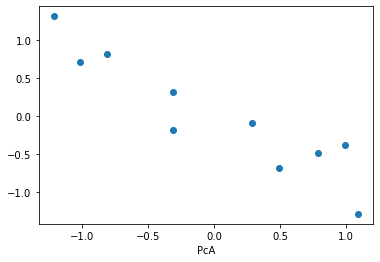

In [136]:
pca_data_2d_1 = sorted_evec.T @ pca_data_2d
plt.scatter(pca_data_2d_1[0],pca_data_2d_1[1])
plt.xlabel('PCA')

raise NotImplementedError()

## Exercise 1.2 PCA: 3-dimenssional Toy Data.

### a) Load dataset and center.

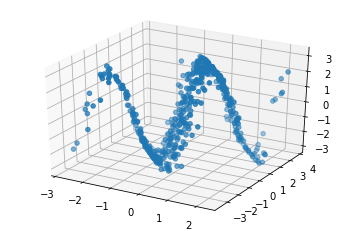

In [137]:
data_3d = pd.read_csv('pca-data-3d.txt', delimiter=',')
data_3d_cent = (data_3d - np.mean(data_3d,axis=0))
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(data_3d_cent['x'],data_3d_cent['y'],data_3d_cent['z']);

### b) Determine PCs and create another scatter plot spanning the data with the coordinate system of the 2 PCs.

In [138]:
cov = np.cov(data_3d_cent.T)
eig_val, eig_vec = np.linalg.eig(cov)
idx = np.argsort(eig_val, axis = 0)[::-1]
sorted_evec = eig_vec[:,idx].T

print('The eigenvalues are ', eig_val[idx])
print('The eigenvectors are ', sorted_evec)
plots = np.array([[0,1],[0,2],[1,2]])

The eigenvalues are  [4.4947884  2.24956199 0.38503192]
The eigenvectors are  [[ 0.12121678  0.1844957   0.9753296 ]
 [ 0.51120047  0.83065188 -0.22066159]
 [-0.85087048  0.52533684  0.00637466]]


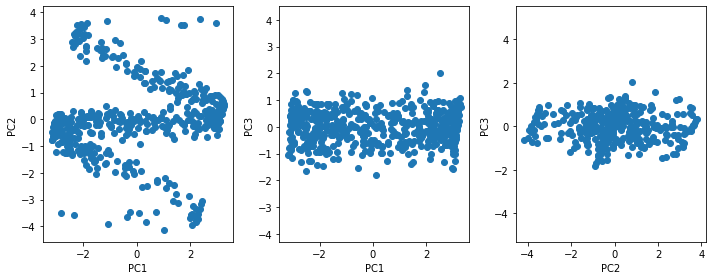

In [143]:
fig = plt.figure(figsize=(10,4))

for i in range(0,plots.shape[0]):
    
    fig.add_subplot(1,3,i+1)
    pca_data_3d = (sorted_evec[plots[i]] @ data_3d_cent.T).T
    plt.scatter(pca_data_3d[0],pca_data_3d[1]);
    plt.axis('equal')
    plt.xlabel(f'PC{plots[i][0]+1}')
    plt.ylabel(f'PC{plots[i][1]+1}')

plt.tight_layout()

### c) 3d Reconstruction

In [ ]:
##########

## Exercise 1.3. Projections of a dynamical system.

In [144]:
expDat = pd.read_csv('expDat.txt', delimiter=',')
x = (expDat - np.mean(expDat,axis=0)).T[1::].T

## a) Find Principal Components.

In [162]:
cov = np.cov(x.T)
eig_val, eig_vec = np.linalg.eig(cov)
idx = np.argsort(eig_val, axis = 0)[::-1]
sorted_evec = eig_vec[:,idx].T
print('The eigenvalues are ', eig_val[idx])
print('The eigenvectors are ', sorted_evec)

The eigenvalues are  [159.49341723  67.25799252   9.97514485   9.36297705   8.15833485
   6.89324689   6.64686451   6.0456826    5.36119565   4.98763946
   4.74616151   4.36056924   3.93771182   3.32785307   3.10428712
   2.97036102   2.75474047   2.28976528   1.85208766   1.59194702]
The eigenvectors are  [[ 0.23170068  0.20360727  0.25007147  0.23686223  0.24044926  0.20440472
   0.24056995  0.24586141  0.17737701  0.19751861  0.23351045  0.25924694
   0.20479872  0.20921262  0.21936356  0.1823281   0.22130098  0.21830107
   0.25554948  0.21697206]
 [-0.21830578 -0.19920182 -0.22656499  0.25687137  0.15817077  0.22088493
  -0.19487112 -0.16185434  0.22633286 -0.12746    -0.2675393  -0.17544956
   0.25260932  0.25479589  0.24699672  0.24628233  0.21538704  0.24338423
  -0.2849078  -0.22436526]
 [ 0.10440694  0.22953607  0.37448821  0.02510211  0.24055312  0.17227829
  -0.10386734 -0.16363664  0.28136859 -0.00336538 -0.415635   -0.1614494
  -0.06128927  0.07689358 -0.22606157 -0.238202

### b) Plot temporal evolution.

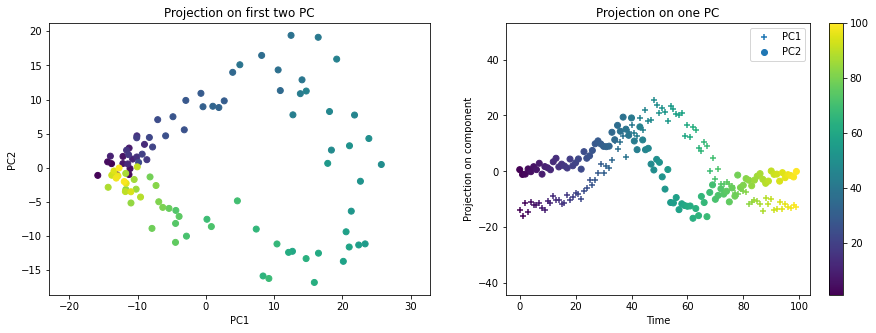

In [168]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
M_2d = sorted_evec[0:2]
pca_2d= (M_2d @ x.T).T
color = np.arange(1,101)
sc = plt.scatter(pca_2d[0],pca_2d[1],c=color)
plt.axis('equal');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on first two PC');

fig.add_subplot(1,2,2)
M_1 = sorted_evec[0]
pca_1= (M_1 @ x.T).T
plt.scatter(np.arange(0,100),pca_1,c=color,marker='+',label='PC1')

M_2 = sorted_evec[1]
pca_2= (M_2 @ x.T).T
plt.scatter(np.arange(0,100),pca_2,c=color,marker='o',label='PC2');
plt.colorbar(sc)
plt.axis('equal');
plt.xlabel('Time')
plt.ylabel('Projection on component')

plt.legend()
plt.title('Projection on one PC');

### c) Create new dataset.

In [20]:
x_shuff = np.zeros((20,100))

for i in range(0,20):
    sequence = np.random.choice(range(100), 100, replace=False)
    x_shuff[i]= x[f'V{i+1}'][sequence].values

In [187]:
np.cov(x_shuff.T).shape

(100, 100)

### d) Plot the covariance matrices and scree plots.

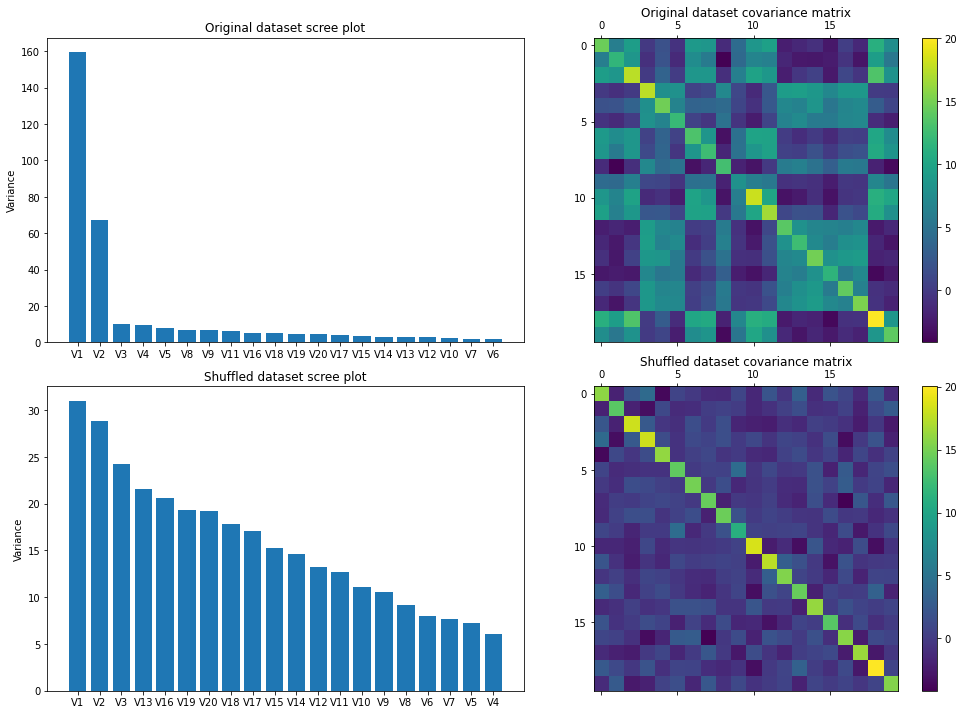

In [229]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[14,10])

ax1.bar(x.columns[idx],eig_val[idx])
ax1.set_title('Original dataset scree plot')
ax1.set_ylabel('Variance')

ax2.matshow(cov)
ax2.set_title('Original dataset covariance matrix')
fig.colorbar(c, ax=ax2)

cov_shuff = np.cov(x_shuff)
eig_val_shuff, eig_vec_shuff = np.linalg.eig(cov_shuff)
idx_s = np.argsort(eig_val_shuff, axis = 0)[::-1]
sorted_evec_shuff = eig_vec_shuff[:,idx_s].T

ax3.set_title('Shuffled dataset scree plot')
ax3.set_ylabel('Variance')
ax3.bar(x.columns[idx_s],eig_val_shuff[idx_s]);

ax4.set_title('Shuffled dataset covariance matrix')
ax4.matshow(cov_shuff)
fig.colorbar(c, ax=ax4)

fig.tight_layout()

## Exercise 1.4: Image data compression and reconstruction.

### a) Sample in patches.

In [25]:
p = 5000
num_im = 10

patches =np.zeros((4,256,p))
type_p = ['b','d','n','t']

for i in range(0,4):
    num = 0
    
    for j in range(num_im):
        
        img = plt.imread('imgpca/'+type_p[i]+str(j+1)+'.jpg', format='JPG')
        
        for k in range(p//num_im):
            
            x = np.random.randint(0, np.shape(img)[0]-16)
            y = np.random.randint(0, np.shape(img)[1]-16)
            
            patch = img[x:x+16, y:y+16]
            patches[i,:,num] = np.ndarray.flatten(patch)
            num+=1
            
build = patches[0]-np.mean(patches[0],axis=0)
nature = patches[2]-np.mean(patches[2],axis=0)

### b) Calculate PCs of the images.

In [34]:
cov_b = np.cov(build)
eval_b, evec_b = np.linalg.eig(cov_b)
idx_b = np.argsort(eval_b, axis = 0)[::-1]
s_evec_b = evec_b[:,idx].T

M_b = s_evec_b[0:24]

u_b = s_evec_b @ build

cov_n = np.cov(nature)
eval_n, evec_n = np.linalg.eig(cov_n)
idx_n = np.argsort(eval_n, axis = 0)[::-1]
s_evec_n = evec_b[:,idx].T

M_n = s_evec_n[0:24]

u_n = M_n @ nature

### b) Scree plots.

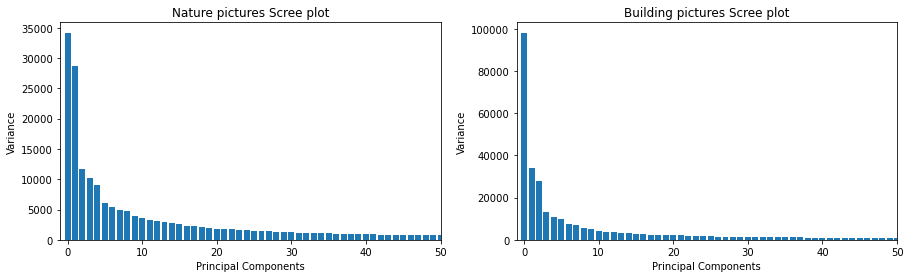

In [233]:
fig = plt.figure(figsize=(15,4))
fig.add_subplot(1,2,1)
plt.bar(range(0,256),eval_n[idx_n])
plt.xlim([-1,50])
plt.ylabel('Variance')
plt.xlabel('Principal Components')
plt.title('Nature pictures Scree plot')

fig.add_subplot(1,2,2)
plt.bar(range(0,256),eval_b[idx_b])
plt.xlim([-1,50]);
plt.ylabel('Variance')
plt.title('Building pictures Scree plot')
plt.xlabel('Principal Components');

It can be seen that using the first 10 principal components of the Nature pictures could be enough, and we can see a big dominance of the first two PCs.

In the case of the Building pictures, 6 or 7 principal components could be used, since there is a big dominance of the first component and the subsequent ones are already far less important.

##### Something about compression ratios qualitatively?

### d) Comparing image statistics

In [93]:
M = np.array([1,2,4,8,16,100])

# For pictures from nature, they are non overlapping regions (256,512)
patch_x = np.int(256/16)
patch_y = np.int(512/16)
patch_n = np.empty((3,patch_x,patch_y,256))

for i in range(1,4):

    img = plt.imread('imgpca/'+type_p[2]+str(i)+'.jpg', format='JPG')
    sh_im = img.shape
    
    for j in range(0,patch_x):
         for k in range(0,patch_y):
                patch = img[j*16:16*j+16, k*16:16*k+16]
                patch_n[i-1,j,k,:] = patch.flatten()
                
M_n = s_evec_n[0:M]

Still to do patches on the Building pictures (little more complicated because of the measures). And continue.